In [19]:
import cv2 as cv
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

In [20]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [21]:
trackerTypes = ['BOOSTING', 'MIL', 'KCF','TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']

In [22]:
def createTrackerByName(trackerType):
    # Create a tracker based on tracker name
    if trackerType == trackerTypes[0]:
        tracker = cv.TrackerBoosting_create()
    elif trackerType == trackerTypes[1]:
        tracker = cv.TrackerMIL_create()
    elif trackerType == trackerTypes[2]:
        tracker = cv.TrackerKCF_create()
    elif trackerType == trackerTypes[3]:
        tracker = cv.TrackerTLD_create()
    elif trackerType == trackerTypes[4]:
        tracker = cv.TrackerMedianFlow_create()
    elif trackerType == trackerTypes[5]:
        tracker = cv.TrackerGOTURN_create()
    elif trackerType == trackerTypes[6]:
        tracker = cv.TrackerMOSSE_create()
    elif trackerType == trackerTypes[7]:
        tracker = cv.TrackerCSRT_create()
    else:
        tracker = None
        print('Incorrect tracker name')
        print('Available trackers are:')
        for t in trackerTypes:
            print(t)

    return tracker

In [23]:
print("Default tracking algoritm is CSRT \n"
      "Available tracking algorithms are:\n")
for t in trackerTypes:
    print(t)

trackerType = "CSRT"

# Set video to load
videoPath = DATA_PATH + "videos/cycle.mp4"

Default tracking algoritm is CSRT 
Available tracking algorithms are:

BOOSTING
MIL
KCF
TLD
MEDIANFLOW
GOTURN
MOSSE
CSRT


In [24]:
# Create a video capture object to read videos
cap = cv.VideoCapture(videoPath)

# Read first frame
success, frame = cap.read()

# quit if unable to read the video file
if not success:
    print('Failed to read video')

In [25]:
## Select boxes
colors = []
for i in range(3):
    # Select some random colors
    colors.append((randint(64, 255), randint(64, 255),
                   randint(64, 255)))
# Select the bounding boxes
bboxes = [(471, 250, 66, 159), (349, 232, 69, 102)]
print('Selected bounding boxes {}'.format(bboxes))

Selected bounding boxes [(471, 250, 66, 159), (349, 232, 69, 102)]


In [26]:
## Initialize MultiTracker
# There are two ways you can initialize multitracker
# 1. tracker = cv2.MultiTracker("CSRT")
# All the trackers added to this multitracker
# will use CSRT algorithm as default
# 2. tracker = cv2.MultiTracker()
# No default algorithm specified

# Initialize MultiTracker with tracking algo
# Specify tracker type

# Create MultiTracker object
multiTracker = cv.MultiTracker_create()

# Initialize MultiTracker
for bbox in bboxes:
    multiTracker.add(createTrackerByName(trackerType), frame, bbox)

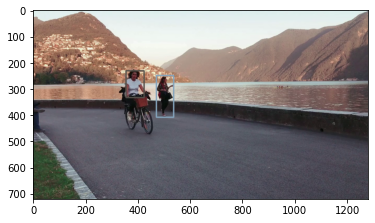

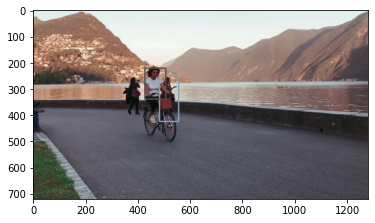

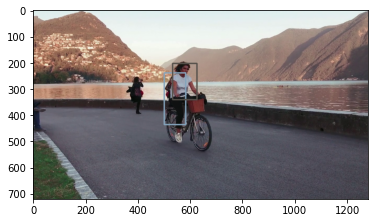

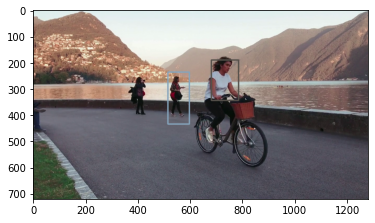

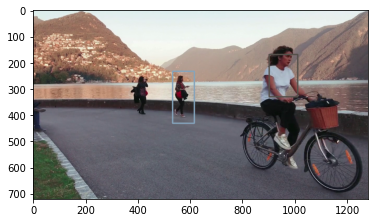

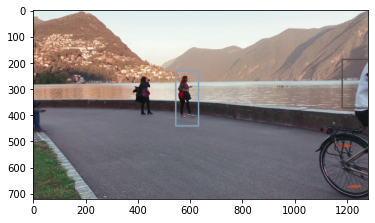

In [27]:
# We will display only 5 frames
count = 0

# Process video and track objects
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # get updated location of objects in subsequent frames
    success, boxes = multiTracker.update(frame)

    # draw tracked objects
    for i, newbox in enumerate(boxes):
        p1 = (int(newbox[0]), int(newbox[1]))
        p2 = (int(newbox[0] + newbox[2]), int(newbox[1] + newbox[3]))
        cv.rectangle(frame, p1, p2, colors[i], 4, cv.LINE_AA)

    # show frame
    if count % 10 == 0:
        plt.imshow(frame[:,:,::-1])
        plt.show()

    count += 1

    if count > 50:
        break